# ロジスティック回帰

## 初心者向けロジスティック回帰解説サイト
http://tkengo.github.io/blog/2016/06/04/yaruo-machine-learning5/

## 必要なライブラリのインポート

In [6]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

/Users/satoutakumi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 区分が 0 のデータを 50個、1 のデータを 50個 用意し、訓練データとテストデータを 7:3 に分割

In [7]:
np.random.seed(seed=0)
#二次元正規分のかたまりを 2 組作成
#二次元正規分布　https://mathtrain.jp/tahenryogauss
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))
 
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))

#X_0,X_1および、y_0,y_1を結合し、X,yに格納
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)

#訓練データとテストデータを 7:3 に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 

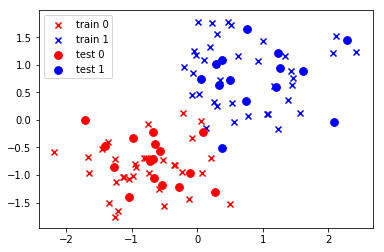

In [8]:
# 特徴データを標準化(平均 0、標準偏差 1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

#データのプロット
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')
 
plt.legend(loc='upper left')

## sklearnによるロジスティック回帰実装

In [9]:
from sklearn.linear_model import LogisticRegression
 
# 訓練
lr = LogisticRegression()
print(lr.fit(X_train_std, y_train))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [10]:
# テストデータ 30個を分類
print (lr.predict(X_test_std))
#-------------------------------------------------------------------------
# [ 0.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  1.  0.  1.  1.
#   1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
#-------------------------------------------------------------------------
 
# 精度を確認
print (lr.score(X_test_std, y_test))
#----------------
# 0.966666666667
#----------------

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]
0.9666666666666667


[0.13310259]
[[1.82092295 2.26785197]]


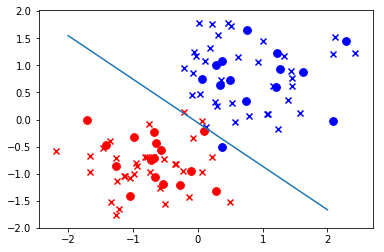

In [11]:
print (lr.intercept_)
#-----------------------------
# [ 0.13310259]
#-----------------------------
 
print (lr.coef_)
#-----------------------------
# [[ 1.82092295  2.26785197]]
#-----------------------------
 
w_0 = lr.intercept_[0]
w_1 = lr.coef_[0,0]
w_2 = lr.coef_[0,1]
 
# 
# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# 境界線 プロット
plt.plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

 
# データを重ねる
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')


## ロジスティック回帰理論
シグモイド関数を用いて
#### $$f_\theta(\boldsymbol{x})=\frac{1}{1+\exp(\boldsymbol{\theta}^T\boldsymbol{x})}\tag{1}$$
とすると
#### $$ \begin{align}
y &= \left\{
\begin{array}{ll}
1 & (\boldsymbol{\theta}^T\boldsymbol{x} \geq 0) \\
0 & (\boldsymbol{\theta}^T\boldsymbol{x} \lt 0)
\end{array}
\right.\\
&= \left\{
\begin{array}{ll}
1 & (f_\theta(\boldsymbol{x})\geq 0.5) \\
0 & (f_\theta(\boldsymbol{x}) \lt 0.5)
\end{array}
\right.
\end{align}\tag{2}
$$
と分類されます．従って，$\boldsymbol{x}$の分類が1である確率を
#### $$f_\theta(\boldsymbol{x})=P(y=1|\boldsymbol{x})\tag{3}$$
と表せます．この時尤度関数は
#### $$ L(\theta)=\prod_{i=1}^{n} P(y^{(i)}=1|\boldsymbol{x})^{y^{(i)}}P(y^{(i)}=0|\boldsymbol{x})^{1-y^{(i)}}\tag{4}$$ 
となります．この尤度関数を最大にすることが目的です．この関数の対数尤度は
#### $$ \log L(\theta)=\sum_{i=1}^{n} \bigl\{y^{(i)}\log P(y^{(i)}=1|\boldsymbol{x})+(1-y^{(i)})\log P(y^{(i)}=0|\boldsymbol{x})  \bigr\}\tag{5}$$
となります．この関数の重みによる微分は
#### $$ \frac{\partial \log L(\theta)}{\partial \theta_j}= \sum_{i=1}^{n}\bigl(y^{(i)}-f_\theta(\boldsymbol{x}) \bigr)x_j^{(i)}\tag{6}$$
この関数の最大値を求める問題から，最小値を求めるために，この偏微分のマイナスをとると
#### $$ \frac{\partial  L^-(\theta)}{\partial \theta_j}= \sum_{i=1}^{n}\bigl(f_\theta(\boldsymbol{x})-y^{(i)}\bigr)x_j^{(i)}\tag{7}$$
従って，パラメータ更新は
#### $$\theta_j:=\theta_j-C\sum_{i=1}^{n}\bigl(f_\theta(\boldsymbol{x})-y^{(i)}\bigr)x_j^{(i)}\tag{8}$$
となります．

## ロジスティック回帰フルスクラッチ

In [12]:
class LogisticRegression(object):
    def __init__(self,C=0.0001,epoch=10000):
        #式(8)中のC
        self.C=C
        #実行回数
        self.epoch=epoch
        
    #シグモイド関数の定義 式(1)
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    #データの学習    
    def fit(self,X_train,y_train):
        #式中のx
        self.X_train=X_train
        #式中のy
        self.y_train=y_train.reshape(len(y_train),-1)
        
        #weightを定義 式中のθ
        self.weight = np.ones((self.X_train.shape[1], 1)).astype('float32')
        self.b = np.zeros(1).astype('float32')
        
        for i in range(self.epoch):
            #シグモイド関数によるフィッティング
            y = self.sigmoid(np.matmul(self.X_train, self.weight) + self.b)
            delta = y-self.y_train
        
            #パラメータの更新 式(7),(8)
            dW = np.matmul(self.X_train.T, delta)
            db = np.matmul(np.ones(len(self.X_train)), delta)
            self.weight = self.weight - self.C*dW
            self.b = self.b - self.C*db
        
    #データの予想　式(2)    
    def predict(self,X_test):
        t = self.sigmoid(np.matmul(X_test, self.weight) + self.b)>=0.5
        return t*1
    
    #w_0
    def intercept(self):
        return self.b
    
    #w_1,w_2
    def coef(self):
        return self.weight 

In [13]:
log=LogisticRegression()
log.fit(X_train_std, y_train)

In [14]:
pred=log.predict(X_test_std)
print(pred)

[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]]


### 精度評価 

In [15]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.9666666666666667

In [16]:
# precision, recall, f-scoreの計算
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, pred)

(array([0.94117647, 1.        ]),
 array([1.        , 0.92857143]),
 array([0.96969697, 0.96296296]),
 array([16, 14]))

In [17]:
print(log.intercept())
print(log.coef())

[0.13425787]
[[2.6698498 ]
 [3.20034837]]


In [18]:
w0 = log.intercept()[0]
w1 = log.coef()[0,0]
w2 = log.coef()[1,]

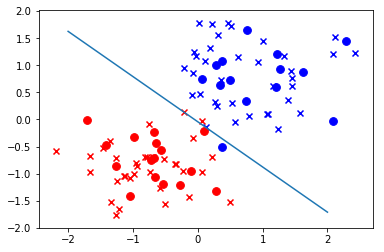

In [19]:
# 境界線 プロット
plt.plot([-2,2], list(map(lambda x: (-w1 * x - w0)/w2, [-2,2])))

# データを重ねる
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

